In [188]:
import pandas as pd
import time

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np


In [189]:
# Load data from MySQL
df = pd.read_csv('COP26(3).csv',index_col=0) #reads csv file

# Filtering 2 columns
df1 = df[['Polarity', 'Tweets']]

In [190]:
def getAnalysis(score):
    if score<0:
        return -1
    elif score ==0:
        return 0
    else:
        return 1
    
df1['polarity'] = df1['Polarity'].apply(getAnalysis)

C:\Users\shama\AppData\Local\Temp\ipykernel_22860\2852615602.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['polarity'] = df1['Polarity'].apply(getAnalysis)


In [191]:
df1['polarity'].value_counts()

 1    47708
 0    30413
-1    21880
Name: polarity, dtype: int64

In [192]:
'''#create a function to check negative, neutral and positive analysis
def getAnalysis(score):
    if score ==  'Negative':
        return -1
    elif score == 'Neutral':
        return 0
    else:
        return 1
    
df1['polarity'] = df1['Analysis'].apply(getAnalysis)'''

"#create a function to check negative, neutral and positive analysis\ndef getAnalysis(score):\n    if score ==  'Negative':\n        return -1\n    elif score == 'Neutral':\n        return 0\n    else:\n        return 1\n    \ndf1['polarity'] = df1['Analysis'].apply(getAnalysis)"

In [193]:
df_pos = df1[df1['polarity'] == 1]
df_neg = df1[df1['polarity'] == -1]

print(len(df_pos), len(df_neg))

47708 21880


In [194]:
df2 = pd.concat([df_pos, df_neg])
len(df2)

69588

Cleaning and Processing the Data

Tokenization

In [195]:
from time import time
start_time = time()

from nltk.tokenize import TweetTokenizer

tk = TweetTokenizer(reduce_len=True)

data = []


X = df2['Tweets'].tolist()
Y = df2['Polarity'].tolist()


for x, y in zip(X, Y):
    if y == 1:
        data.append((tk.tokenize(x), 1))
    else:
        data.append((tk.tokenize(x), -1))
        
print('CPU Time:', time() - start_time)
data[:5]

CPU Time: 27.602654933929443


[(['Climate',
   'change',
   'panic',
   '-',
   'fact',
   'the',
   'cleaner',
   'the',
   'air',
   'is',
   'more',
   'hurricanes',
   'we',
   'get',
   'https://t.co/nAckqSLeef'],
  -1),
 (['@epistemophagy',
   'Digital',
   'technology',
   'allowing',
   'extreme',
   'wealth',
   'concentration',
   ',',
   'media',
   'monopolies',
   ',',
   'short',
   'term',
   'election',
   'and',
   'quarterly',
   'profit',
   'cycles',
   'foreclosing',
   'the',
   'prospect',
   'of',
   'effective',
   'action',
   'on',
   'climate',
   'change',
   'or',
   'covid',
   ',',
   'the',
   'white',
   'Christian',
   'right',
   'declaring',
   'war',
   'after',
   'some',
   'minorities',
   'got',
   'civil',
   'rights',
   '.'],
  -1),
 (['@catturd2',
   'EVERYONE',
   'knows',
   'climate',
   'change',
   'is',
   'a',
   'scam',
   '.',
   'EVERYONE',
   '.',
   'Ice',
   'core',
   'samples',
   'dissipate',
   'CO2',
   'over',
   'time',
   '.',
   'Earth',
   'has',


Lemmatization

In [196]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\shama\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [197]:
from nltk.tag import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer

print(pos_tag(data[0][0]))

[('Climate', 'NNP'), ('change', 'NN'), ('panic', 'NN'), ('-', ':'), ('fact', 'NN'), ('the', 'DT'), ('cleaner', 'JJR'), ('the', 'DT'), ('air', 'NN'), ('is', 'VBZ'), ('more', 'JJR'), ('hurricanes', 'NNS'), ('we', 'PRP'), ('get', 'VBP'), ('https://t.co/nAckqSLeef', 'JJ')]


In [198]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shama\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\shama\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [199]:
def lemmatize_sentence(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized_sentence = []
    for word, tag in pos_tag(tokens):

        if tag.startswith('NN'):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'
        lemmatized_sentence.append(lemmatizer.lemmatize(word, pos))
    return lemmatized_sentence
    
print(lemmatize_sentence(data[0][0]))

['Climate', 'change', 'panic', '-', 'fact', 'the', 'clean', 'the', 'air', 'be', 'more', 'hurricane', 'we', 'get', 'https://t.co/nAckqSLeef']


Cleaning the dataa

In [200]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shama\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [201]:
import re, string

from nltk.corpus import stopwords
STOP_WORDS = stopwords.words('english')
new_stopwords = ['climate change', 'climate', 'change', 'climatechange']
STOP_WORDS.extend(new_stopwords)


def cleaned(token):
    if token == 'u':
        return 'you'
    if token == 'r':
        return 'are'
    if token == 'some1':
        return 'someone'
    if token == 'yrs':
        return 'years'
    if token == 'hrs':
        return 'hours'
    if token == 'mins':
        return 'minutes'
    if token == 'secs':
        return 'seconds'
    if token == 'pls' or token == 'plz':
        return 'please'
    if token == '2morow':
        return 'tomorrow'
    if token == '2day':
        return 'today'
    if token == '4got' or token == '4gotten':
        return 'forget'
    if token == 'amp' or token == 'quot' or token == 'lt' or token == 'gt' or token == '½25':
        return ''
    return token


def remove_noise(tweet_tokens):

    cleaned_tokens = []

    for token, tag in pos_tag(tweet_tokens):
        token = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|'\
                       '(?:%[0-9a-fA-F][0-9a-fA-F]))+','', token)

        token = re.sub("(@[A-Za-z0-9_]+)","", token)

        if tag.startswith("NN"):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'

        lemmatizer = WordNetLemmatizer()
        token = lemmatizer.lemmatize(token, pos)

        cleaned_token = cleaned(token.lower())
        
        if cleaned_token not in string.punctuation and len(cleaned_token) > 2 and cleaned_token not in STOP_WORDS:
            cleaned_tokens.append(cleaned_token)
            
    return cleaned_tokens


print(remove_noise(data[0][0]))

['panic', 'fact', 'clean', 'air', 'hurricane', 'get']


In [202]:
start_time = time()


def list_to_dict(cleaned_tokens):
    return dict([token, True] for token in cleaned_tokens)

cleaned_tokens_list = []

for tokens, label in data:
    cleaned_tokens_list.append((remove_noise(tokens), label))

print('Removed Noise, CPU Time:', time() - start_time)
start_time = time()

final_data = []

for tokens, label in cleaned_tokens_list:
    final_data.append((list_to_dict(tokens), label))
    
print('Data Prepared for model, CPU Time:', time() - start_time)

final_data[:5]

Removed Noise, CPU Time: 233.3403136730194
Data Prepared for model, CPU Time: 0.29796648025512695


[({'panic': True,
   'fact': True,
   'clean': True,
   'air': True,
   'hurricane': True,
   'get': True},
  -1),
 ({'digital': True,
   'technology': True,
   'allow': True,
   'extreme': True,
   'wealth': True,
   'concentration': True,
   'medium': True,
   'monopoly': True,
   'short': True,
   'term': True,
   'election': True,
   'quarterly': True,
   'profit': True,
   'cycle': True,
   'foreclose': True,
   'prospect': True,
   'effective': True,
   'action': True,
   'covid': True,
   'white': True,
   'christian': True,
   'right': True,
   'declare': True,
   'war': True,
   'minority': True,
   'get': True,
   'civil': True},
  -1),
 ({'everyone': True,
   'knows': True,
   'scam': True,
   'ice': True,
   'core': True,
   'sample': True,
   'dissipate': True,
   'co2': True,
   'time': True,
   'earth': True,
   'always': True,
   'get': True,
   'hotter': True,
   'colder': True,
   'level': True,
   'higher': True,
   'million': True,
   'year': True,
   'ago': True,
 

Visualizing the data

Positive words


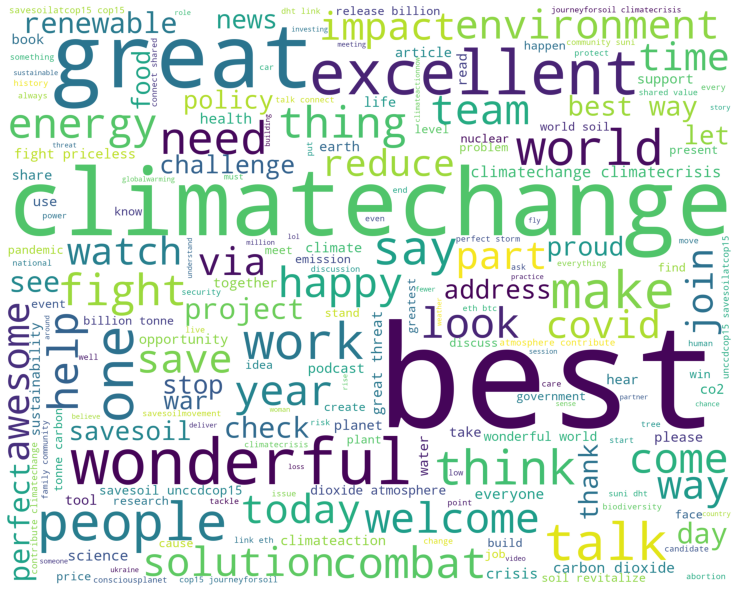

Negative words


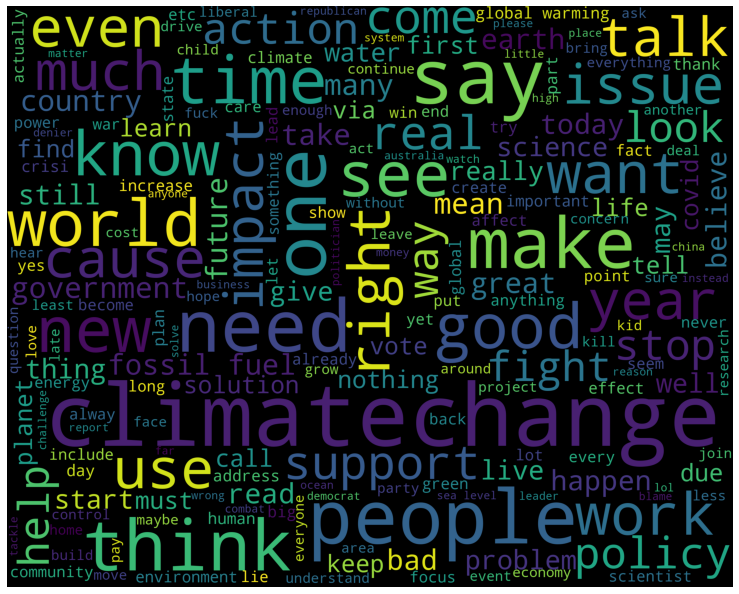

CPU Time: 32.09356141090393


In [203]:
start_time = time()

from wordcloud import WordCloud, STOPWORDS

positive_words = []
negative_words = []


for i in range(len(cleaned_tokens_list)):
    if cleaned_tokens_list[i][1] == 1:
        positive_words.extend(cleaned_tokens_list[i][0])
    else:
        negative_words.extend(cleaned_tokens_list[i][0])

def wordcloud_draw(data, color = 'black'):
    wordcloud = WordCloud(stopwords = STOPWORDS,
                          background_color = color,
                          width = 2500,
                          height = 2000
                         ).generate(' '.join(data))
    plt.figure(1, figsize = (13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive words")
wordcloud_draw(positive_words, 'white')
print("Negative words")
wordcloud_draw(negative_words)        

print('CPU Time:', time() - start_time)

Naive Bayesian Model

Splitting the data

In [204]:
import random

random.Random(140).shuffle(final_data)

trim_index = int(len(final_data) * 0.8)

train_data = final_data[:trim_index]
test_data = final_data[trim_index:]

Training the model

In [205]:
start_time = time()

from nltk.classify.scikitlearn import SklearnClassifier
from nltk import classify
from nltk import NaiveBayesClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier


In [206]:
classifier = NaiveBayesClassifier.train(train_data)
print('------------- NaiveBayes -------------')
print('Accuracy on train data:', classify.accuracy(classifier, train_data))
print('Accuracy on test data:', classify.accuracy(classifier, test_data))

classifier2 = nltk.classify.SklearnClassifier(SVC())
classifier2.train(train_data)
print('------------- SVC -------------')
print('Accuracy on train data:', classify.accuracy(classifier2, train_data))
print('Accuracy on test data:', classify.accuracy(classifier2, test_data))

classifier3 = nltk.classify.SklearnClassifier(MultinomialNB())
classifier3.train(train_data)
print('------------- MultinomialNB -------------')
print('Accuracy on train data:', classify.accuracy(classifier3, train_data))
print('Accuracy on test data:', classify.accuracy(classifier3, test_data))

classifier4 = nltk.classify.SklearnClassifier(LogisticRegression())
classifier4.train(train_data)
print('------------- Logisitic Reg -------------')
print('Accuracy on train data:', classify.accuracy(classifier4, train_data))
print('Accuracy on test data:', classify.accuracy(classifier4, test_data))

'''NuSVC_classifier = nltk.classify.SklearnClassifier(NuSVC())
NuSVC_classifier.train(train_data)
print('------------- NuSVC -------------')
print('Accuracy on train data:', classify.accuracy(NuSVC_classifier, train_data))
print('Accuracy on test data:', classify.accuracy(NuSVC_classifier, test_data))'''

# Output the model accuracy on the train and test data

# Output the words that provide the most information about the sentiment of a tweet.
# These are words that are heavily present in one sentiment group and very rarely present in the other group.
print(classifier.show_most_informative_features(20))

print('\nCPU Time:', time() - start_time)

------------- NaiveBayes -------------
Accuracy on train data: 0.6936949883240524
Accuracy on test data: 0.7641184078172151
------------- SVC -------------
Accuracy on train data: 0.9952757319920963
Accuracy on test data: 0.9948268429372036
------------- MultinomialNB -------------
Accuracy on train data: 0.9911801688521645
Accuracy on test data: 0.9943238971116539
------------- Logisitic Reg -------------
Accuracy on train data: 0.997880366445123
Accuracy on test data: 0.9951142405518034
Most Informative Features
          #onepartystate = True                1 : -1     =    406.2 : 1.0
     #opentheroadsdamien = True                1 : -1     =    406.2 : 1.0
   #sirdavidattenborough = True                1 : -1     =    290.1 : 1.0
                    05th = True                1 : -1     =    290.1 : 1.0
                  ramesh = True                1 : -1     =    290.1 : 1.0
                     lbl = True                1 : -1     =    243.7 : 1.0
               priceless = Tru

In [207]:
import nltk.classify


classifier1 = nltk.classify.SklearnClassifier(LinearSVC())
classifier1.train(train_data)

print('Accuracy on train data:', classify.accuracy(classifier1, train_data))
print('Accuracy on test data:', classify.accuracy(classifier1, test_data))

Accuracy on train data: 0.9998742590264056
Accuracy on test data: 0.9946112947262538


Testing the model

In [208]:
custom_tweet = "I hate the weather today"

custom_tokens = remove_noise(tk.tokenize(custom_tweet))

print(classifier.classify(dict([token, True] for token in custom_tokens)))

-1


In [209]:
custom_tweet = "I loved the show today! It was amazing."

custom_tokens = remove_noise(tk.tokenize(custom_tweet))

print(classifier.classify(dict([token, True] for token in custom_tokens)))

-1


In [210]:
custom_tweet = "I walked to the restaurant."

custom_tokens = remove_noise(tk.tokenize(custom_tweet))

print(classifier.classify(dict([token, True] for token in custom_tokens)))

-1


Asserting the model

In [211]:
from sklearn import metrics


y = [test_data[i][1] for i in range(len(test_data))]

probs = [classifier.prob_classify(test_data[i][0]).prob(1) for i in range(len(test_data))]


print(len(y), len(probs))


fpr, tpr, thresholds = metrics.roc_curve(y, probs)


auc = metrics.roc_auc_score(y, probs)
print('AUC: %.3f' % auc)

13918 13918
AUC: 0.787


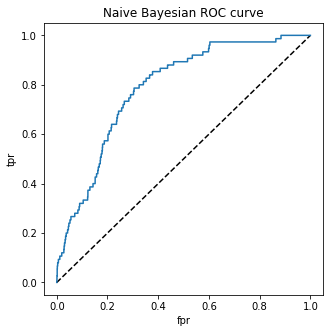

In [212]:
# Plotting the ROC Curve
plt.figure(figsize=(5,5))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='NB')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Naive Bayesian ROC curve')
plt.show()

In [213]:
import numpy as np
probs = [classifier.classify(test_data[i][0]) for i in range(len(test_data))]
y = np.asarray(y)
probs = np.asarray(probs)
pd.crosstab(y, probs, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,-1,1,All
Actual,,,
-1,10587,3256,13843
1,27,48,75
All,10614,3304,13918
